### Group 13 - Programming for Data Science (BUAN 6349.5U1)
- Likith Vinayaka Girirdhar (LXG210034)
- Muaaz Ali Syed (MXS220139)

In [1]:
import socket 
import datetime
print ("My Laptop is : ",socket.gethostname())
print ("Current Time : ",datetime.datetime.now())

My Laptop is :  Likiths-Mac.lan
Current Time :  2023-08-10 11:16:56.721973


In [1]:
#Importing some necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

## Exploring the dataset

In [2]:
# Read the csv file and view the dataset and the shape of the dataset
df = pd.read_csv('airbnb_listings_usa.csv')
df.head(5)
df.shape

/var/folders/3_/_g3bl5vs0xlgybykjk6_xvwh0000gn/T/ipykernel_91442/2861829340.py:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('airbnb_listings_usa.csv')


(325858, 21)

So, the dataset contains 325,858 rows (entries) and 21 columns (features or attributes).

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325858 entries, 0 to 325857
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unnamed: 0                      325858 non-null  int64  
 1   id                              325858 non-null  int64  
 2   name                            325839 non-null  object 
 3   host_id                         325858 non-null  int64  
 4   host_name                       324714 non-null  object 
 5   neighbourhood_group             155047 non-null  object 
 6   neighbourhood                   325146 non-null  object 
 7   latitude                        325858 non-null  float64
 8   longitude                       325858 non-null  float64
 9   room_type                       325858 non-null  object 
 10  price                           325858 non-null  int64  
 11  minimum_nights                  325858 non-null  int64  
 12  number_of_review

- The DataFrame has 325,858 entries and 21 columns.
- Columns include identifiers (`id`, `host_id`), names (`name`, `host_name`), location data (`latitude`, `longitude`, `neighbourhood_group`, `neighbourhood`, `state`, `city`), room information (`room_type`, `price`, `minimum_nights`), review details (`number_of_reviews`, `last_review`, `reviews_per_month`, `number_of_reviews_ltm`), host metrics (`calculated_host_listings_count`), availability (`availability_365`), and license (`license`).
- Data types vary, including integers, floats, and objects (strings).
- Some columns have missing values, notably `neighbourhood_group`, `last_review`, `reviews_per_month`, and `license`.

Let us go through the summary statistics of numeric fields

In [4]:
# Numeric fields - Summary Statistics
df.describe()

,Unnamed: 0,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,325858.000000,3.258580e+05,3.258580e+05,325858.000000,325858.000000,325858.000000,325858.000000,325858.000000,263166.00000,325858.000000,325858.000000,325858.000000
mean,162928.500000,1.541106e+17,1.446528e+08,34.676058,-106.354815,284.915304,13.430175,39.457850,1.69220,27.108900,182.361099,11.889817
std,94067.246346,2.736013e+17,1.449951e+08,6.213029,24.176674,835.569711,28.783033,75.724832,2.01294,79.983052,134.095115,20.672830
min,0.000000,1.090000e+02,2.300000e+01,18.920250,-159.714620,0.000000,1.000000,0.000000,0.01000,1.000000,0.000000,0.000000
25%,81464.250000,2.394619e+07,2.311836e+07,32.775202,-118.410259,97.000000,2.000000,1.000000,0.33000,1.000000,55.000000,0.000000
50%,162928.500000,4.511097e+07,9.320864e+07,34.102360,-117.131590,159.000000,3.000000,9.000000,1.01000,2.000000,174.000000,3.000000
75%,244392.750000,5.420558e+07,2.388338e+08,39.948015,-82.549423,275.000000,30.000000,42.000000,2.49000,12.000000,322.000000,16.000000
max,325857.000000,7.251653e+17,4.810023e+08,47.748000,-70.913250,100000.000000,1250.000000,2600.000000,190.48000,660.000000,365.000000,1284.000000


- `Unnamed: 0`: An index-like column with a range of values from 0 to 325,857.
- `id` and `host_id`: Identification columns with relatively large values indicating unique identifiers.
- `latitude` and `longitude`: Geographical coordinates of the listings.
- `price`: The listing prices range from a negative value to a high value, with varying averages and standard deviations.
- `minimum_nights`: Minimum nights required for booking range from 0 to 100,000, with an average around 284 nights.
- `number_of_reviews` and `number_of_reviews_ltm`: The number of reviews varies, with a wide range and varying averages.
- `reviews_per_month`: The average number of reviews per month varies, with an average around 39.
- `calculated_host_listings_count`: The number of listings by each host ranges from 0 to 660, with an average around 27.
- `availability_365`: The availability ranges from 0 to 365 days, with an average around 182 days.

Let us go through the summary statistics of string fields

In [5]:
# String fields - Summary Statistics
df.drop(df.describe(), axis='columns').describe()

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review,license,state,city
count,325839,324714,155047,325146,325858,263166,86635,325858,325858
unique,264019,33120,34,1575,4,2965,48064,19,31
top,Boutique Hostel,Blueground,City of Los Angeles,Unincorporated Areas,Entire home/apt,2022-09-05,Exempt,CA,Los Angeles
freq,152,4876,39002,13400,243098,13190,6603,127329,91630


Statistics provided by `df.drop(df.describe(), axis='columns').describe()` for the categorical (string) columns:

- `name`: The column "name" has 264,019 unique values. The most frequent name is "Boutique Hostel" which appears 152 times.

- `host_name`: The column "host_name" has 33,120 unique values. The most frequent host name is "Blueground" which appears 4,876 times.

- `neighbourhood_group`: The column "neighbourhood_group" has 34 unique values. The most frequent neighborhood group is "City of Los Angeles" which appears 39,002 times.

- `neighbourhood`: The column "neighbourhood" has 1,575 unique values. The most frequent neighborhood is "Unincorporated Areas" which appears 13,400 times.

- `room_type`: The column "room_type" has 4 unique values. The most frequent room type is "Entire home/apt" which appears 243,098 times.

- `last_review`: The column "last_review" has 2,965 unique values. The most frequent last review date is "2022-09-05" which appears 13,190 times.

- `license`: The column "license" has 48,064 unique values. The most frequent license type is "Exempt" which appears 6,603 times.

- `state`: The column "state" has 19 unique values. The most frequent state is "CA" (California) which appears 127,329 times.

- `city`: The column "city" has 31 unique values. The most frequent city is "Los Angeles" which appears 91,630 times.

These statistics provide insights into the distribution of the categorical columns.

#### Since Unnamed: 0 is a generic row id - we can drop it

In [6]:
df.drop('Unnamed: 0', axis='columns', inplace=True)

In [7]:
dup_with_id=100*(len(df) - len(df.drop_duplicates()))/len(df)
dup_wo_id=100*(len(df.drop('id', axis='columns')) - len(df.drop('id', axis='columns').drop_duplicates())) / len(df.drop('id', axis='columns'))
print('Percentage of all Duplication with id:', dup_with_id)
print('Percentage of all Duplication without id:', dup_wo_id)

Percentage of all Duplication with id: 14.059805191218262
Percentage of all Duplication without id: 14.076990590993622


Here's a brief summary of the calculations and their results:

- `Percentage of all Duplication with id`: This calculates the percentage of duplicated rows in the entire DataFrame, considering all columns, including the 'id' column. The result is approximately 14.06%.

- `Percentage of all Duplication without id`: This calculates the percentage of duplicated rows in the DataFrame after removing the 'id' column. The result is approximately 14.08%.

Both percentages indicate that around 14% of the rows in the DataFrame are duplicated. The slight difference between the two percentages may be due to the impact of the 'id' column on identifying duplicate rows.

In [8]:
#Drop all duplications with and without id
df.drop_duplicates(inplace=True)
df.drop_duplicates(subset='name', inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264020 entries, 0 to 325857
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              264020 non-null  int64  
 1   name                            264019 non-null  object 
 2   host_id                         264020 non-null  int64  
 3   host_name                       263481 non-null  object 
 4   neighbourhood_group             111270 non-null  object 
 5   neighbourhood                   263322 non-null  object 
 6   latitude                        264020 non-null  float64
 7   longitude                       264020 non-null  float64
 8   room_type                       264020 non-null  object 
 9   price                           264020 non-null  int64  
 10  minimum_nights                  264020 non-null  int64  
 11  number_of_reviews               264020 non-null  int64  
 12  last_review     

After removing duplicate rows and specifically targeting duplicates in the 'name' column, here's a summary of the resulting DataFrame's structure:

- The DataFrame now has 264,020 entries and 20 columns.
- Column descriptions remain the same as before, including identifiers, names, location data, room information, review details, host metrics, availability, and license.
- Data types continue to vary, including integers, floats, and objects (strings).
- Some columns still have missing values, such as `neighbourhood_group`, `last_review`, `reviews_per_month`, and `license`.

The memory usage has also decreased, now consuming approximately 42.3 megabytes of memory.

- Let's convert name, host_name, license to string
- Let's convert neighbourhood_group, neighbourhood, room_type, state, city to category
- Let's convert last_review to datetime format

In [10]:
df = df.astype({'name': 'string', 'host_name': 'string', 'license': 'string', 'neighbourhood_group': 'category', 'neighbourhood': 'category', 
                                'room_type': 'category', 'state': 'category', 'city': 'category'})
df['last_review'] = pd.to_datetime(df['last_review'])

In [11]:
#Now let us look at the summary statistics after converting the data type
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,2.640200e+05,2.640200e+05,264020.000000,264020.000000,264020.000000,264020.000000,264020.000000,217819.000000,264020.000000,264020.000000,264020.000000
mean,1.492197e+17,1.418405e+08,34.669666,-104.767481,282.903379,12.501814,41.047443,1.718892,23.560302,179.672120,12.480816
std,2.702577e+17,1.440900e+08,6.707990,25.491072,836.681107,28.361691,76.628480,2.011747,69.992886,132.877778,20.717269
min,1.090000e+02,2.300000e+01,18.920250,-159.714620,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,2.348756e+07,2.253885e+07,30.475710,-118.426347,97.000000,2.000000,1.000000,0.350000,1.000000,53.000000,0.000000
50%,4.433749e+07,8.778981e+07,34.206625,-104.981730,159.000000,3.000000,10.000000,1.060000,2.000000,171.000000,3.000000
75%,5.401595e+07,2.335019e+08,40.677782,-80.130278,275.000000,30.000000,45.000000,2.520000,10.000000,318.000000,17.000000
max,7.251653e+17,4.810023e+08,47.748000,-70.913250,100000.000000,1250.000000,1724.000000,190.480000,660.000000,365.000000,949.000000


Summary of the statistics provided by `df.describe()` for the numerical columns after removing duplicates:

- `id`, `host_id`, `latitude`, `longitude`, `price`, `minimum_nights`, `number_of_reviews`, `reviews_per_month`, `calculated_host_listings_count`, `availability_365`, `number_of_reviews_ltm`:

  - The statistics for these columns are similar to those described earlier, indicating the range, mean, standard deviation, and quartile values for each column.

  - Notably, the average price is around $282.90, and the average minimum nights required for booking is approximately 12.50 nights.

  - The average number of reviews per month is around 41.05, and the calculated host listings count averages around 23.56.

  - Availability spans around 179.67 days on average, and the average number of reviews in the last twelve months is approximately 12.48.

##### Given that id and host_id serve solely as identifiers, and latitude and longitude represent geographical coordinates, we will disregard them for now.

#### Now let us identify the observations that have the minimum and maximum prices

In [12]:
df.nsmallest(5, 'price')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,state,city
16959,40561078,Gold-Diggers Hotel,209561894,Gold Diggers,City of Los Angeles,Hollywood,34.090542,-118.312508,Hotel room,0,1,92,2022-09-08,2.16,2,0,65,<NA>,CA,Los Angeles
16960,40561079,The LINE Hotel,272064927,The LINE Hotel,City of Los Angeles,Koreatown,34.062040,-118.300910,Hotel room,0,1,8,2020-02-16,0.22,1,0,0,<NA>,CA,Los Angeles
17579,41740614,Hotel Erwin,269304681,Hotel Erwin,City of Los Angeles,Venice,33.986950,-118.472480,Hotel room,0,30,145,2022-09-04,4.64,1,0,66,<NA>,CA,Los Angeles
17869,42228983,El Patio Inn,311453463,El Patio Inn,City of Los Angeles,Studio City,34.139410,-118.381100,Hotel room,0,1,0,NaT,NaN,1,0,0,<NA>,CA,Los Angeles
17872,42229033,Nite Inn at Universal City,311439116,Nite Inn @,City of Los Angeles,Studio City,34.137300,-118.364020,Hotel room,0,1,42,2022-07-04,1.66,1,0,17,<NA>,CA,Los Angeles


In [13]:
print('Total number of listings with price equal to 0:', np.sum(df['price']==0))

Total number of listings with price equal to 0: 93


In [14]:
# We then check if it's only for room_type = 'Hotel room'
df.loc[df['price']==0, 'room_type'].value_counts()

Hotel room         92
Private room        1
Entire home/apt     0
Shared room         0
Name: room_type, dtype: int64

The `df.nsmallest(5, 'price')` function call retrieves the smallest 5 values in the 'price' column from the DataFrame. Here's a summary of the smallest 5 rows based on the 'price' column:

- These are the five listings with the lowest prices among all the entries.
- The columns in the displayed output include 'id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm', 'license', 'state', and 'city'.

For example, the first row indicates a hotel room named "Gold-Diggers Hotel" in Hollywood, Los Angeles, with a price of $0. It has a minimum stay of 1 night, 92 reviews, and other relevant information.

Certain values in the dataset are deemed invalid, exemplified by 'Gold-Diggers Hotel,' which is presently listed at $159 per night. Given that there are more than 90 listings, it is challenging to precisely and conveniently identify these listings using the 'id' alone. Even using the 'name' field requires the use of other variables such as 'neighbourhood' to narrow down the search. Consequently, we will retain these values without making any modifications.

In [15]:
df.nlargest(5, 'price')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,state,city
101663,47475849,"WELCOME to ""WORLD MAP SUITE"" in the heart of P...",380705136,Duda,NaN,Mission Bay,32.79190,-117.23807,Private room,100000,1,1,2021-01-09,0.05,1,0,0,<NA>,CA,San Diego
149492,53810192,Enjoy Peace & tranquillity. A home away from home,430653443,Reginald,NaN,Pembroke Pines,26.02708,-80.24724,Entire home/apt,100000,3,14,2022-08-14,1.92,1,365,14,<NA>,FL,Broward
216537,53775685,Entire Cozy Unit(15 mins to Manhattan),245395267,Joes,NaN,Ward E (councilmember James Solomon),40.72330,-74.03946,Entire home/apt,99999,60,6,2022-06-20,0.66,1,70,6,<NA>,NJ,Jersey City
18844,44033589,Villa de la Vina,76993354,Nick,Unincorporated Areas,Unincorporated Santa Monica Mountains,34.11957,-118.79260,Entire home/apt,30000,5,14,2021-09-05,0.72,1,15,0,<NA>,CA,Los Angeles
176749,53150179,"K B M Resorts- BAY-35 Presidential 5bd, 5ba be...",429407284,Kbm,Maui,Lahaina,20.88017,-156.68492,Entire home/apt,26774,1,0,NaT,NaN,166,198,0,"450040490000, TA-041-615-7216-01",HI,Hawaii


The `df.nlargest(5, 'price')` function call retrieves the largest 5 values in the 'price' column from the DataFrame. Here's a summary of the largest 5 rows based on the 'price' column:

- These are the five listings with the highest prices among all the entries.
- The columns in the displayed output include 'id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm', 'license', 'state', and 'city'.

For example, the first row indicates a private room named "WELCOME to 'WORLD MAP SUITE' in the heart of P..." in Mission Bay, San Diego, with an exceptionally high price of $100,000 per night. It has a minimum stay of 1 night, 1 review, and other relevant information.

Its maximum observations are valid, although the listings themselves may be gag-jokes or just for attention (e.g. 'WELCOME to "WORLD MAP SUITE" in the heart of P.B.!' listing which appears to be just a regular home).

#### Now let us identify the observations that have the maximum value for minimum_nights

In [16]:
df.nlargest(5, 'minimum_nights')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,state,city
236594,4204302,Prime W. Village location 1 bdrm,17550546,Genevieve,Manhattan,Greenwich Village,40.73293,-73.99782,Entire home/apt,180,1250,2,2014-11-09,0.02,1,0,0,<NA>,NY,New York City
110764,15327674,Upscale 2 Bedroom/1.5 Bath with Private Entry,5138158,Barbara,NaN,Inner Richmond,37.77494,-122.47238,Entire home/apt,195,1125,65,2020-05-01,0.90,1,179,0,STR0001667,CA,San Francisco
133179,79867,"DC, Near Metro II",7086,Edward,NaN,"Ivy City, Arboretum, Trinidad, Carver Langston",38.90618,-76.98498,Private room,500,1125,10,2016-09-30,0.08,3,266,0,<NA>,DC,Washington D.C.
133183,4967,"DC, Near Metro",7086,Edward,NaN,"Ivy City, Arboretum, Trinidad, Carver Langston",38.91217,-76.99249,Private room,500,1125,31,2016-09-22,0.21,3,254,0,<NA>,DC,Washington D.C.
134518,18430302,Light filled apartment next to the Big Bear Cafe,15906842,Stuart,NaN,"Edgewood, Bloomingdale, Truxton Circle, Eckington",38.91250,-77.01356,Entire home/apt,98,1125,91,2020-03-01,1.39,1,0,0,<NA>,DC,Washington D.C.


The `df.nlargest(5, 'minimum_nights')` function call retrieves the largest 5 values in the 'minimum_nights' column from the DataFrame. Here's a summary of the largest 5 rows based on the 'minimum_nights' column:

- These are the five listings with the highest values in the 'minimum_nights' column, indicating longer minimum stay requirements.
- The columns in the displayed output include 'id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm', 'license', 'state', and 'city'.

For example, the first row indicates an entire home/apt named "Prime W. Village location 1 bdrm" in Greenwich Village, Manhattan, with a minimum stay requirement of 1250 nights. It has a price of $180, 2 reviews, and other relevant information.

#### Now let us identify the observations that have the maximum value of number_of_reviews

In [17]:
df.nlargest(5, 'number_of_reviews')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,state,city
125702,8357,The Mushroom Dome Retreat & LAND of Paradise S...,24281,Kitty And Michael,NaN,Unincorporated Areas,37.00939,-121.88547,Entire home/apt,159,2,1724,2022-09-25,10.73,2,100,125,<NA>,CA,Santa Cruz County
17954,42409434,The Burlington Hotel,229716119,Simone,City of Los Angeles,Westlake,34.05981,-118.26963,Entire home/apt,113,1,1702,2022-09-06,56.17,5,124,833,<NA>,CA,Los Angeles
222414,35158303,"SAHARA Las Vegas, Marra 1 King",263748930,SAHARA Las Vegas,NaN,Unincorporated Areas,36.14215,-115.15706,Private room,238,1,1542,2022-09-05,83.80,11,298,860,<NA>,NV,Clark County
215898,44799007,Sonder Battery Park | Studio Apartment,219517861,Sonder (NYC),NaN,Ward F (councilmember Jermaine D. Robinson),40.70617,-74.01486,Entire home/apt,521,2,1518,2022-09-03,62.13,31,250,910,<NA>,NJ,Jersey City
252618,37122502,Amazing Micro Unit W/ communal rooftop and kit...,266755066,The Ridge,Manhattan,East Village,40.72380,-73.99038,Private room,243,1,1384,2022-09-06,40.43,4,343,793,<NA>,NY,New York City


The `df.nlargest(5, 'number_of_reviews')` function call retrieves the largest 5 values in the 'number_of_reviews' column from the DataFrame. Here's a summary of the largest 5 rows based on the 'number_of_reviews' column:

- These are the five listings with the highest values in the 'number_of_reviews' column, indicating the listings with the most reviews.
- The columns in the displayed output include 'id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm', 'license', 'state', and 'city'.

For example, the first row indicates an entire home/apt named "The Mushroom Dome Retreat & LAND of Paradise S..." in Unincorporated Areas, Santa Cruz County, with a total of 1,724 reviews. It has a price of $159, a minimum stay requirement of 2 nights, and other relevant information.

#### Now let us identify the observations that have the maximum values of reviews_per_month

In [18]:
df.nlargest(5, 'reviews_per_month')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,state,city
222429,35159128,"SAHARA Las Vegas, Marra Style King",263748930,SAHARA Las Vegas,NaN,Unincorporated Areas,36.143470,-115.156250,Private room,247,1,927,2022-09-05,190.48,11,290,927,<NA>,NV,Clark County
216543,53843545,Skyline views in Lower Manhattan,435369966,Millennium Downtown,NaN,Ward E (councilmember James Solomon),40.710026,-74.011360,Private room,760,1,887,2022-09-12,126.11,7,361,887,<NA>,NJ,Jersey City
138692,659366271388568374,Standard Queen Bed at Selina Union Market Wash...,459231442,Selina Union Market Washington DC,NaN,"Downtown, Chinatown, Penn Quarters, Mount Vern...",38.905465,-77.015807,Entire home/apt,197,1,259,2022-09-13,105.00,3,138,259,Exempt,DC,Washington D.C.
291024,54227245,The Vinyl at Music Row - 1 Bedroom Apartment,438770271,Christy,NaN,District 19,36.146430,-86.792320,Entire home/apt,108,1,768,2022-09-14,93.66,3,354,768,<NA>,TN,Nashville
29766,578174478591578178,Sonder Lüm | King Room w/ Terrace,253105222,Sonder (Los Angeles),Other Cities,Inglewood,33.944020,-118.340860,Private room,145,2,523,2022-08-26,86.21,35,364,523,<NA>,CA,Los Angeles


The `df.nlargest(5, 'reviews_per_month')` function call retrieves the largest 5 values in the 'reviews_per_month' column from the DataFrame. Here's a summary of the largest 5 rows based on the 'reviews_per_month' column:

- These are the five listings with the highest values in the 'reviews_per_month' column, indicating the listings with the most reviews per month.
- The columns in the displayed output include 'id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm', 'license', 'state', and 'city'.

For example, the first row indicates a private room named "SAHARA Las Vegas, Marra Style King" in Unincorporated Areas, Clark County, with a reviews per month value of 190.48. It has a price of $247, a minimum stay requirement of 1 night, 927 total reviews, and other relevant information.

#### Now let us identify the observations that have the maximum values of calculated_host_listings_count

In [19]:
df.nlargest(5, 'calculated_host_listings_count')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,state,city
171967,47812700,"Near Beaches and Attractions! 2 Modern Units, ...",5615582,RoomPicks,Honolulu,Primary Urban Center,21.28237,-157.82870,Private room,434,1,1,2021-08-15,0.08,660,356,0,<NA>,HI,Hawaii
171972,47812703,Rare Gem! Walk to Kaimana Beach & Kapiolani Park,5615582,RoomPicks,Honolulu,Primary Urban Center,21.28170,-157.82853,Private room,217,1,0,NaT,NaN,660,356,0,Exempt,HI,Hawaii
171975,47812705,"Adventure Awaits! Pool, Near Saint Augustine b...",5615582,RoomPicks,Honolulu,Primary Urban Center,21.28207,-157.82865,Private room,214,1,16,2021-12-25,0.99,660,355,2,Exempt,HI,Hawaii
173736,49445200,"Rare Find! Two Comfy Units, Close to Attractions",5615582,RoomPicks,Hawaii,Kau,19.42981,-155.25764,Private room,523,1,0,NaT,NaN,660,224,0,<NA>,HI,Hawaii
173925,49712609,"Rare Find! 2 Onsite Pools, Restaurant and Bar",5615582,RoomPicks,Honolulu,Primary Urban Center,21.28578,-157.83983,Private room,263,1,0,NaT,NaN,660,338,0,Exempt,HI,Hawaii


The `df.nlargest(5, 'calculated_host_listings_count')` function call retrieves the largest 5 values in the 'calculated_host_listings_count' column from the DataFrame. Here's a summary of the largest 5 rows based on the 'calculated_host_listings_count' column:

- These are the five listings with the highest values in the 'calculated_host_listings_count' column, indicating the listings with the most calculated host listings.
- The columns in the displayed output include 'id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm', 'license', 'state', and 'city'.

For example, the first row indicates a private room named "Near Beaches and Attractions! 2 Modern Units, ..." in Primary Urban Center, Honolulu, with a calculated host listings count of 660. It has a price of $434, a minimum stay requirement of 1 night, 1 review, and other relevant information.

#### Now let us identify the observations that have the maximum values of number_of_reviews_ltm

In [20]:
df.nlargest(5, 'number_of_reviews_ltm')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,state,city
259583,49381739,Come catch a Broadway Show & stay in Times Square,397872858,M,Manhattan,Theater District,40.763600,-73.98473,Private room,457,1,1229,2022-08-23,78.61,12,319,949,<NA>,NY,New York City
222429,35159128,"SAHARA Las Vegas, Marra Style King",263748930,SAHARA Las Vegas,NaN,Unincorporated Areas,36.143470,-115.15625,Private room,247,1,927,2022-09-05,190.48,11,290,927,<NA>,NV,Clark County
215898,44799007,Sonder Battery Park | Studio Apartment,219517861,Sonder (NYC),NaN,Ward F (councilmember Jermaine D. Robinson),40.706170,-74.01486,Entire home/apt,521,2,1518,2022-09-03,62.13,31,250,910,<NA>,NJ,Jersey City
216543,53843545,Skyline views in Lower Manhattan,435369966,Millennium Downtown,NaN,Ward E (councilmember James Solomon),40.710026,-74.01136,Private room,760,1,887,2022-09-12,126.11,7,361,887,<NA>,NJ,Jersey City
222414,35158303,"SAHARA Las Vegas, Marra 1 King",263748930,SAHARA Las Vegas,NaN,Unincorporated Areas,36.142150,-115.15706,Private room,238,1,1542,2022-09-05,83.80,11,298,860,<NA>,NV,Clark County


The `df.nlargest(5, 'number_of_reviews_ltm')` function call retrieves the largest 5 values in the 'number_of_reviews_ltm' column from the DataFrame. Here's a summary of the largest 5 rows based on the 'number_of_reviews_ltm' column:

- These are the five listings with the highest values in the 'number_of_reviews_ltm' column, indicating the listings with the most reviews in the last 12 months.
- The columns in the displayed output include 'id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm', 'license', 'state', and 'city'.

For example, the first row indicates a private room named "Come catch a Broadway Show & stay in Times Square" in Theater District, Manhattan, with a number of reviews in the last 12 months (number_of_reviews_ltm) of 949. It has a price of $457, a minimum stay requirement of 1 night, 1229 total reviews, and other relevant information.

### String fields ranges and formats

##### Lets look at all the string fields

In [21]:
df.drop(df.describe(), axis='columns').describe()

/var/folders/3_/_g3bl5vs0xlgybykjk6_xvwh0000gn/T/ipykernel_91442/2318837673.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.drop(df.describe(), axis='columns').describe()


,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review,license,state,city
count,264019,263481,111270,263322,264020,217819,70312,264020,264020
unique,264019,32895,34,1574,4,2963,47677,19,31
top,Panoramic Ocean View Venice Beach,Blueground,City of Los Angeles,Unincorporated Areas,Entire home/apt,2022-09-05 00:00:00,Exempt,CA,Los Angeles
freq,1,2428,18249,12041,199135,11234,5046,77235,43826
first,NaN,NaN,NaN,NaN,NaN,2010-10-04 00:00:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2022-09-28 00:00:00,NaN,NaN,NaN


The `df.drop(df.describe(), axis='columns').describe()` function call calculates summary statistics for the remaining columns of the DataFrame after removing the columns that were described using the `df.describe()` function earlier. Here's a summary of the remaining columns:

- The columns in the displayed output include 'name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type', 'last_review', 'license', 'state', and 'city'.
- The "count" row indicates the number of non-null values in each column.
- The "unique" row indicates the number of unique values in each column.
- The "top" row indicates the most frequent value in each column.
- The "freq" row indicates the frequency of the most frequent value in each column.
- The "first" and "last" rows indicate the earliest and latest values in each datetime-like column ('last_review' in this case).

For example, the output provides information about the unique values, most common values, and frequency of occurrence in columns like 'name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type', 'last_review', 'license', 'state', and 'city'.

#### Pulling the most frequent observations for host_name 

In [22]:
df[df['host_name']=='Blueground'].head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,state,city
12124,29499586,"Downtown 1BR w/ Doorman, nr Disney Hall",107434423,Blueground,City of Los Angeles,Downtown,34.054053,-118.251148,Entire home/apt,195,31,0,NaT,NaN,638,251,0,<NA>,CA,Los Angeles
12266,29670430,"Marina Del Rey 2BR w/ Gym, nr Venice Beach",107434423,Blueground,City of Los Angeles,Del Rey,33.987610,-118.440500,Entire home/apt,243,31,2,2020-08-05,0.05,638,312,0,<NA>,CA,Los Angeles
12268,29670960,"2BR Loft Marina Del Rey, w/ Spa, nr Venice Beach",107434423,Blueground,City of Los Angeles,Venice,33.987367,-118.445900,Entire home/apt,226,31,4,2020-06-22,0.10,638,298,0,<NA>,CA,Los Angeles
12550,30413739,"Hollywood 1BR w/ Pool & Spa, nr coffee shops",107434423,Blueground,City of Los Angeles,Hollywood,34.099970,-118.314660,Entire home/apt,144,31,1,2022-08-11,1.00,638,320,1,<NA>,CA,Los Angeles
12552,30390978,"1BR Downtown, w/ Pool+Spa, near Disney Hall",107434423,Blueground,City of Los Angeles,Downtown,34.054053,-118.251148,Entire home/apt,178,31,1,2020-06-02,0.04,638,333,0,<NA>,CA,Los Angeles


#### Let us pull the unique values for neighbourhood_group

In [23]:
df['neighbourhood_group'].value_counts()

City of Los Angeles     18249
Manhattan               15201
Brooklyn                14489
Other Cities            14381
Maui                     8928
Honolulu                 8307
Hawaii                   6289
Queens                   5785
Kauai                    3981
Unincorporated Areas     3479
Newport                  1739
Bronx                    1513
Washington               1510
Other neighborhoods      1124
Providence               1073
Downtown                  664
Capitol Hill              477
Central Area              459
Staten Island             423
Rainier Valley            411
West Seattle              395
Queen Anne                390
Ballard                   306
Beacon Hill               246
Delridge                  235
Cascade                   204
University District       197
Northgate                 191
Bristol                   178
Lake City                 135
Kent                      131
Magnolia                   92
Seward Park                49
Interbay  

It shows that the "City of Los Angeles" has the highest number of properties (18249), followed by "Manhattan" (15201) and "Brooklyn" (14489). The distribution provides insights into the popularity and distribution of properties across various geographic areas.

#### Investigate the most frequently occurring values in the 'neighbourhood' field

In [24]:
df[df['neighbourhood']=='Unincorporated Areas'].head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,state,city
115908,4952,Butterfly Inn near Stanford with weekly cleaning,7054,Mei Lin,NaN,Unincorporated Areas,37.43932,-122.15741,Private room,70,31,76,2022-04-02,0.48,5,58,1,<NA>,CA,San Mateo County
115909,21373,Bonsai Garden near Stanford with weekly cleaning,7054,Mei Lin,NaN,Unincorporated Areas,37.43972,-122.15532,Private room,70,31,264,2022-05-15,1.76,5,283,1,<NA>,CA,San Mateo County
115912,40560,MOST COMFORTABLE BED EVER,174725,Megan,NaN,Unincorporated Areas,37.45379,-122.13867,Private room,115,2,140,2022-09-01,0.96,2,261,6,<NA>,CA,San Mateo County
115914,62799,"Zen Bedroom in Palo Alto, includes weekly clea...",7054,Mei Lin,NaN,Unincorporated Areas,37.43934,-122.15723,Private room,83,31,149,2022-08-13,1.48,5,237,1,<NA>,CA,San Mateo County
115917,75284,Garden Oasis walk to Stanford with weekly clea...,7054,Mei Lin,NaN,Unincorporated Areas,37.43923,-122.15745,Private room,72,31,208,2022-07-21,1.50,5,277,2,<NA>,CA,San Mateo County


#### The unique values for room_type

In [25]:
df['room_type'].value_counts()

Entire home/apt    199135
Private room        61228
Shared room          2546
Hotel room           1111
Name: room_type, dtype: int64

#### The unique values for license

In [26]:
df['license'].value_counts()

Exempt                                               5046
City registration pending                            2517
Exempt: This listing is a licensed hotel, mote...    1151
Exempt - This listing is a transient occupancy...     650
Exempt - This listing is a bed and breakfast          420
                                                     ... 
STR-OPLI-19-002703                                      1
STR-OPLI-19-003054                                      1
STR-OPLI-22-001486                                      1
STR-OPLI-22-001022                                      1
STR-OPLI-19-001034                                      1
Name: license, Length: 47677, dtype: Int64

Variants exist such as 'Exempt' and 'Exempt: This listing is a licensed hotel, motel, or bed and breakfast'; however due to its sheer size (unique values > 47,000), let's leave it as is.

#### The unique values for state

In [27]:
df['state'].value_counts()

CA    77235
NY    37411
HI    27505
TX    25754
FL    16002
NV    13654
TN     7519
IL     6931
LA     6575
DC     6211
CO     5643
WA     5614
MA     5236
OR     4807
RI     4631
MN     4095
NJ     4062
NC     2976
OH     2159
Name: state, dtype: int64

#### The unique values for city

In [28]:
df['city'].value_counts()

Los Angeles           43826
New York City         37411
Hawaii                27505
Austin                17874
Broward               16002
San Diego             13955
Clark County          13654
Nashville              7519
Chicago                6931
New Orleans            6575
San Francisco          6312
Washington D.C.        6211
Dallas                 6056
Denver                 5643
Seattle                5614
Santa Clara County     5271
Boston                 4800
Rhode Island           4631
Portland               4539
Twin Cities MSA        4095
Oakland                3066
Asheville              2976
San Mateo County       2935
Jersey City            2462
Columbus               2159
Fort Worth             1824
Newark                 1600
Santa Cruz County      1533
Cambridge               436
Pacific Grove           337
Salem                   268
Name: city, dtype: int64

### Datetime formats

#### Let's check the minimum and maximum observations for last_review

In [29]:
df.nsmallest(5, 'last_review')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,state,city
109356,44680,Cute Noe/Mission Apartment,196626,Paul,NaN,Mission,37.75131,-122.42167,Entire home/apt,153,60,3,2010-10-04,0.02,1,173,0,<NA>,CA,San Francisco
90,90986,Vintage Charming Guest House,491953,Cheryl Francis,City of Los Angeles,Mid-City,34.03948,-118.34081,Entire home/apt,105,180,1,2011-05-21,0.01,1,365,0,<NA>,CA,Los Angeles
109385,59831,Lovely quiet private room in Home,287859,Lawrence,NaN,Outer Sunset,37.75674,-122.49178,Private room,100,60,1,2011-05-23,0.01,1,0,0,<NA>,CA,San Francisco
109412,71779,1BRアパート,368770,Fukuko,NaN,Inner Richmond,37.77487,-122.46543,Entire home/apt,100,30,2,2011-09-30,0.01,1,248,0,<NA>,CA,San Francisco
233847,27883,East Village Sanctuary,120223,Jen,Manhattan,East Village,40.72421,-73.98509,Entire home/apt,100,30,25,2011-12-10,0.17,1,0,0,<NA>,NY,New York City


In [30]:
print('Total number of listings with last review dates before 2020:', np.sum(df['last_review'].dt.year < 2020))

Total number of listings with last review dates before 2020: 18564


Some values are invalid: For example, 'Lovely quiet private room in Home' by 'Lawrence' currently has its last review date in November 2022. Since it's highly unlikely that active listings have last review dates prior 2020 (2 years ago) and due to their sheer size (number of listings > 18,000), let's leave them as is.

In [31]:
df.nlargest(5, 'last_review')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,state,city
287008,24094071,"Cozy East Nashville Home, 7 minutes to Downtown",22770966,Ryan,NaN,District 5,36.20696,-86.75541,Entire home/apt,160,1,328,2022-09-28,6.04,2,302,103,<NA>,TN,Nashville
94770,3836973,Lovely House in Pacific Grove (Long term rental),19763195,Paul,NaN,Pacific Grove,36.60527,-121.92805,Entire home/apt,264,30,476,2022-09-27,4.82,1,365,5,<NA>,CA,Pacific Grove
94783,6437330,"Cottage on 17 Mile Dr, Pebble Beach. Tesla Cha...",10870177,Victoria,NaN,Pacific Grove,36.58413,-121.93430,Entire home/apt,231,2,575,2022-09-27,6.43,1,118,52,<NA>,CA,Pacific Grove
94820,14388930,Guest Quarters Near Asilomar & Pebble Beach #0335,14882503,Richard,NaN,Pacific Grove,36.62395,-121.93423,Entire home/apt,195,5,77,2022-09-27,1.13,1,92,16,<NA>,CA,Pacific Grove
94916,34365620,Miller Suite: Mid Century Modern in the Forest,1186274,Staci,NaN,Pacific Grove,36.60526,-121.93523,Entire home/apt,225,2,324,2022-09-27,8.07,1,298,121,<NA>,CA,Pacific Grove


Some values appear invalid: For example, 'Cozy East Nashville Home, 7 minutes to Downtown' by 'Ryan' currently has its last review date in November 2022 and not September 2022. Although it's possible to manually update them, it's not clear when to start and end so let's leave them as is. (It's also possible that the newer last reviews were added after the last update of this dataset.)

In [32]:
temp_df = df.groupby(['host_id', 'city']).count()['id'].reset_index() \
                    .rename({'id': 'manual_host_listings_count'}, axis='columns') \
                    .merge(df[['host_id', 'city', 'calculated_host_listings_count']], 
                           on=['host_id', 'city'], how='left')
temp_df['diff'] = temp_df['manual_host_listings_count'] - temp_df['calculated_host_listings_count']
temp_df = temp_df[abs(temp_df['diff'])>0]
temp_df['diff'].value_counts()

-1.0     10111
-2.0      3214
-3.0      1984
-4.0      1075
-5.0       747
         ...  
-52.0        4
-58.0        3
-46.0        3
-50.0        2
-55.0        1
Name: diff, Length: 74, dtype: int64

### Missing Values

In [33]:
print('Percentage of missing values per field:\n', 100*df.isnull().mean())

Percentage of missing values per field:
 id                                 0.000000
name                               0.000379
host_id                            0.000000
host_name                          0.204151
neighbourhood_group               57.855465
neighbourhood                      0.264374
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       17.499053
reviews_per_month                 17.499053
calculated_host_listings_count     0.000000
availability_365                   0.000000
number_of_reviews_ltm              0.000000
license                           73.368684
state                              0.000000
city                               0.000000
dtype: float64


Prints the percentage of missing values in each field of the DataFrame. It indicates that:

- The "neighbourhood_group" column has the highest percentage of missing values (57.86%).
- The "license" column has a considerable percentage of missing values (73.37%).
- The "host_name" column has a moderate percentage of missing values (20.42%).
- The "last_review" and "reviews_per_month" columns have around 17.50% missing values.
- Other columns have relatively lower percentages of missing values.

Due to the absence of a searchable identifier (for example, the inability to search using 'id') and the lack of a reliable source of information for certain fields (such as finding information on 'license'), it is not feasible to manually fill in some of the fields. Therefore, we will retain these fields in their current state without any modifications.

## Exploration for Insights

#### 1) Which listings have the highest/lowest number of reviews in the last 12 months? 
To get a clearer picture, let's only consider mature listings which will be defined as
having number_of_reviews in total >= 10

In [34]:
df[df['number_of_reviews']>=10].nlargest(5, 'number_of_reviews_ltm')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,state,city
259583,49381739,Come catch a Broadway Show & stay in Times Square,397872858,M,Manhattan,Theater District,40.763600,-73.98473,Private room,457,1,1229,2022-08-23,78.61,12,319,949,<NA>,NY,New York City
222429,35159128,"SAHARA Las Vegas, Marra Style King",263748930,SAHARA Las Vegas,NaN,Unincorporated Areas,36.143470,-115.15625,Private room,247,1,927,2022-09-05,190.48,11,290,927,<NA>,NV,Clark County
215898,44799007,Sonder Battery Park | Studio Apartment,219517861,Sonder (NYC),NaN,Ward F (councilmember Jermaine D. Robinson),40.706170,-74.01486,Entire home/apt,521,2,1518,2022-09-03,62.13,31,250,910,<NA>,NJ,Jersey City
216543,53843545,Skyline views in Lower Manhattan,435369966,Millennium Downtown,NaN,Ward E (councilmember James Solomon),40.710026,-74.01136,Private room,760,1,887,2022-09-12,126.11,7,361,887,<NA>,NJ,Jersey City
222414,35158303,"SAHARA Las Vegas, Marra 1 King",263748930,SAHARA Las Vegas,NaN,Unincorporated Areas,36.142150,-115.15706,Private room,238,1,1542,2022-09-05,83.80,11,298,860,<NA>,NV,Clark County


In [35]:
df[df['number_of_reviews']>=10].nsmallest(5, 'number_of_reviews_ltm')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,state,city
2,51307,Spanish Bungalow Guest House LA CA. 30 plus ni...,235568,David,City of Los Angeles,Atwater Village,34.12206,-118.26783,Entire home/apt,75,30,138,2020-12-13,0.98,2,224,0,<NA>,CA,Los Angeles
3,184314,Boho Chic Flat..Steps to Beach!,884031,Ashley,City of Los Angeles,Venice,33.97487,-118.46312,Entire home/apt,125,30,30,2017-12-24,0.22,1,0,0,<NA>,CA,Los Angeles
13,52997,Historical Queen Anne Victorian,244186,Albert,Other Cities,Pasadena,34.15227,-118.10359,Private room,85,60,34,2017-01-17,0.24,3,364,0,<NA>,CA,Los Angeles
14,3021,Furnished Bedroom /Hollywood Hills -HSR19-004287,3415,Nataraj,City of Los Angeles,Hollywood Hills West,34.11160,-118.38223,Entire home/apt,87,31,23,2018-10-31,0.21,4,215,0,<NA>,CA,Los Angeles
18,53945,Cheerful Beverly Hills Apartment,239905,Michael,City of Los Angeles,Carthay,34.06171,-118.37258,Entire home/apt,135,31,142,2019-04-15,1.00,1,365,0,<NA>,CA,Los Angeles


The first code snippet retrieves the top 5 listings with the highest "number_of_reviews_ltm" among those with at least 10 total reviews:

- Listing 259583 in Manhattan has a private room for 457, 1229 total reviews, and 319 reviews in the last month.
- Listing 222429 in Las Vegas has a private room for 247, 927 total reviews, and 290 reviews in the last month.
- Listing 215898 in New Jersey has an entire home/apartment for 521, 1518 total reviews, and 250 reviews in the last month.
- Listing 216543 in New Jersey has a private room for 760, 887 total reviews, and 361 reviews in the last month.
- Listing 222414 in Las Vegas has a private room for 238, 1542 total reviews, and 298 reviews in the last month.

The second code snippet retrieves the 5 listings with the smallest "number_of_reviews_ltm" among those with at least 10 total reviews:

- Listing 2 in Los Angeles has an entire home/apartment for 75, 138 total reviews, and 0 reviews in the last month.
- Listing 3 in Los Angeles has an entire home/apartment for 125, 30 total reviews, and 0 reviews in the last month.
- Listing 13 in Pasadena has a private room for $85, 34 total reviews, and 0 reviews in the last month.
- Listing 14 in Los Angeles has an entire home/apartment for 87, 23 total reviews, and 0 reviews in the last month.
- Listing 18 in Los Angeles has an entire home/apartment for 135, 142 total reviews, and 0 reviews in the last month.

It appears that mature listings with the highest number of reviews in the last 12 months are mostly located near tourist areas (e.g. Broadway Show), are hosted by commericial entities (e.g. SAHARA Las Vegas), have 'Private room' room types and have low minimum nights while mature listings with the lowest number of reviews in the last 12 months are mostly located near residential areas (e.g. Beverly Hills Apartment), are hosted by individuals (e.g. David), have 'Entire home/apt' room types and have high minimum nights.

#### 2) Which hosts on average have listings with the highest/lowest number of reviews in the last 12 months?

Similarly, to get a clearer picture, let's only consider mature listings which will be defined as having number_of_reviews in total >= 10.

In [36]:
df[df['number_of_reviews']>=10].groupby(['host_id', 'host_name']).mean().nlargest(5, 'number_of_reviews_ltm')

/var/folders/3_/_g3bl5vs0xlgybykjk6_xvwh0000gn/T/ipykernel_91442/1136720379.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df[df['number_of_reviews']>=10].groupby(['host_id', 'host_name']).mean().nlargest(5, 'number_of_reviews_ltm')


,,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
host_id,host_name,,,,,,,,,,
229716119,Simone,4.240943e+07,34.059810,-118.269630,113.00,1.0,1702.00,56.1700,5.0,124.00,833.00
263082239,At Mine,1.505101e+17,26.107775,-80.107925,67.25,1.0,469.75,56.3875,4.0,244.50,469.75
438770271,Christy,5.423342e+07,36.145350,-86.793040,109.00,1.0,460.00,56.7850,3.0,352.00,460.00
174393062,Hotel Pepper Tree,2.518627e+07,33.832910,-117.967050,196.50,1.0,726.50,13.9600,2.0,362.00,402.00
266755066,The Ridge,3.712242e+07,40.723213,-73.989510,263.00,1.0,642.50,19.7100,4.0,323.25,332.25


In [37]:
df[df['number_of_reviews']>=10].groupby(['host_id', 'host_name']).mean().nsmallest(5, 'number_of_reviews_ltm')

/var/folders/3_/_g3bl5vs0xlgybykjk6_xvwh0000gn/T/ipykernel_91442/563205756.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df[df['number_of_reviews']>=10].groupby(['host_id', 'host_name']).mean().nsmallest(5, 'number_of_reviews_ltm')


,,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
host_id,host_name,,,,,,,,,,
783,Jason,364.0,39.76672,-104.97906,179.0,185.0,87.0,0.530,1.0,358.0,0.0
990,Alexandra,21745.0,39.74490,-104.97711,40.0,30.0,234.0,1.540,1.0,303.0,0.0
6041,Miranda,3040654.0,40.77758,-73.90950,48.0,30.0,14.0,0.160,1.0,0.0,0.0
6527,Ami,5589.0,38.91887,-77.04008,70.0,31.0,95.0,0.600,1.0,106.0,0.0
6829,Barrett,12394996.0,34.04345,-118.33076,168.0,30.0,70.5,1.025,2.0,365.0,0.0


The first code snippet groups the listings by host_id and host_name, calculates the mean values for each group, and then retrieves the top 5 hosts with the highest "number_of_reviews_ltm" among those hosts with at least 10 total reviews:

- Host Simone (host_id: 229716119) has an average listing price of 113, minimum nights of 1, average number of reviews of 1702, and an average of 124 reviews in the last month.
- Host At Mine (host_id: 263082239) has an average listing price of 67.25, minimum nights of 1, average number of reviews of 469.75, and an average of 244.5 reviews in the last month.
- Host Christy (host_id: 438770271) has an average listing price of 109, minimum nights of 1, average number of reviews of 460, and an average of 352 reviews in the last month.
- Host Hotel Pepper Tree (host_id: 174393062) has an average listing price of 196.5, minimum nights of 1, average number of reviews of 726.5, and an average of 402 reviews in the last month.
- Host The Ridge (host_id: 266755066) has an average listing price of 263, minimum nights of 1, average number of reviews of 642.5, and an average of 332.25 reviews in the last month.

The second code snippet retrieves the 5 hosts with the smallest "number_of_reviews_ltm" among those hosts with at least 10 total reviews:

- Host Jason (host_id: 783) has an average listing price of 179, minimum nights of 185, average number of reviews of 87, and 0 reviews in the last month.
- Host Alexandra (host_id: 990) has an average listing price of 40, minimum nights of 30, average number of reviews of 234, and 0 reviews in the last month.
- Host Miranda (host_id: 6041) has an average listing price of 48, minimum nights of 30, average number of reviews of 14, and 0 reviews in the last month.
- Host Ami (host_id: 6527) has an average listing price of 70, minimum nights of 31, average number of reviews of 95, and 0 reviews in the last month.
- Host Barrett (host_id: 6829) has an average listing price of 168, minimum nights of 30, average number of reviews of 70.5, and 0 reviews in the last month.

It appears that on average hosts who have mature listings with the highest number of reviews in the last 
12 months are mostly commericial entities (e.g. Hotel Pepper Tree) while hosts who have mature listings 
with the lowest number of reviews in the last 12 months are mostly individuals (e.g. Jason).
The major differences in number of minimum nights between the two host types reinforce the finding in the Q1 
section above.

#### 3) Relationship between Number of listings and neighbourhood group

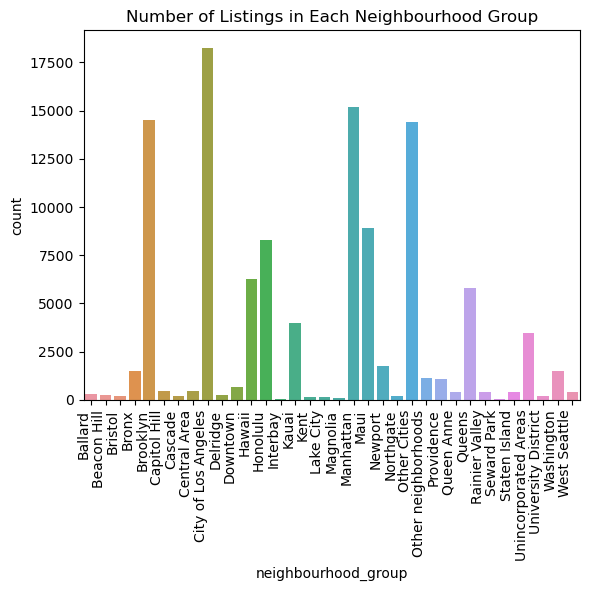

In [38]:
sns.countplot(x='neighbourhood_group', data=df)
plt.title('Number of Listings in Each Neighbourhood Group')
plt.xticks(rotation=90, ha='right')
plt.show()

We can see most of the listings are in the neighbhohood of major cities

#### 4) Does a listing's price or minimum nights correlate with its number of reviews in the last 12 months?

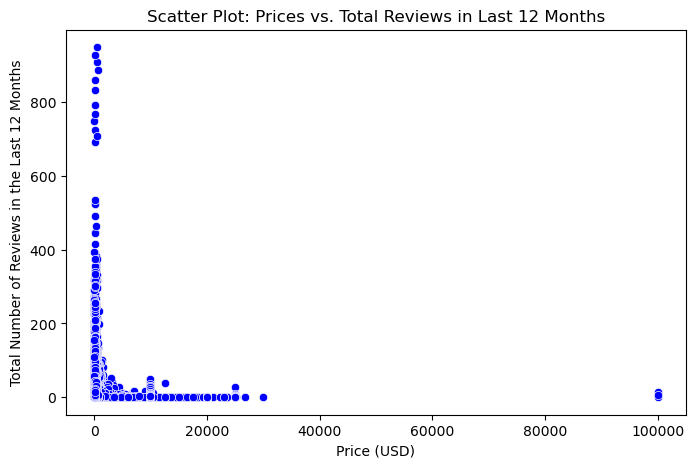

In [39]:
# Scatter Plot for Prices (USD) vs. Total Number of Reviews in the Last 12 Months
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, color='blue', x='price', y='number_of_reviews_ltm')
plt.xlabel('Price (USD)')
plt.ylabel('Total Number of Reviews in the Last 12 Months')
plt.title('Scatter Plot: Prices vs. Total Reviews in Last 12 Months')
plt.show()

Based on median, listings with higher prices or minimum nights have lower number of reviews in the last 12 months.

#### 6) Which listing room types on median have the highest/lowest number of reviews in the last 12 months?

/var/folders/3_/_g3bl5vs0xlgybykjk6_xvwh0000gn/T/ipykernel_91442/478851275.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.barplot(data=df.groupby('room_type').mean().reset_index(), x='number_of_reviews_ltm', y='room_type')


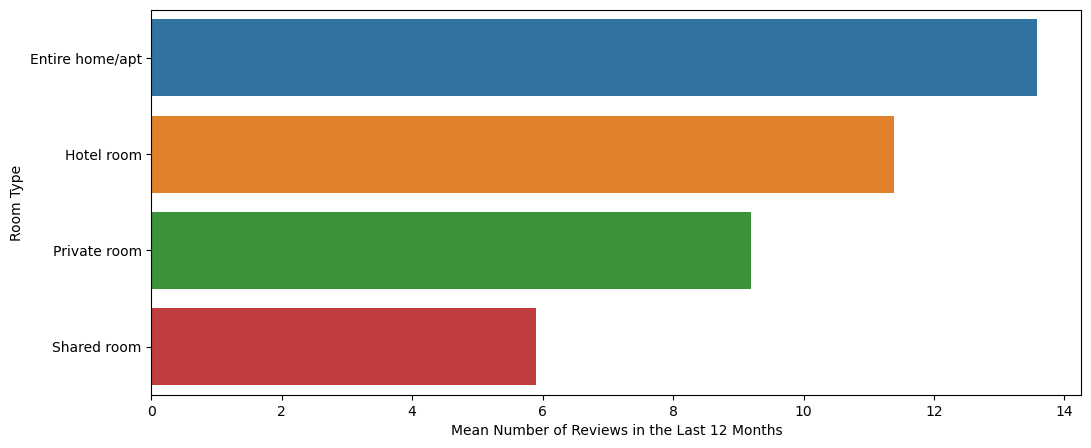

In [40]:
# Bar Plot
sns.barplot(data=df.groupby('room_type').mean().reset_index(), x='number_of_reviews_ltm', y='room_type')                    
plt.xlabel('Mean Number of Reviews in the Last 12 Months')
plt.ylabel('Room Type') 
plt.gcf().set_size_inches(12, 5) 
plt.show()

Based on the bar chart, on median, 'Entire home/apt' room types have the highest number of reviews in the last 12 months while 'Shared room' room types have the lowest number of reviews in the last 12 months.

#### 7) Do listings with indicated licenses on median differ from listings without indicated licenses in their numbers of reviews in the last 12 months?

/var/folders/3_/_g3bl5vs0xlgybykjk6_xvwh0000gn/T/ipykernel_91442/3322553371.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.barplot(data=temp_df.groupby('license_indicated').median().reset_index(),


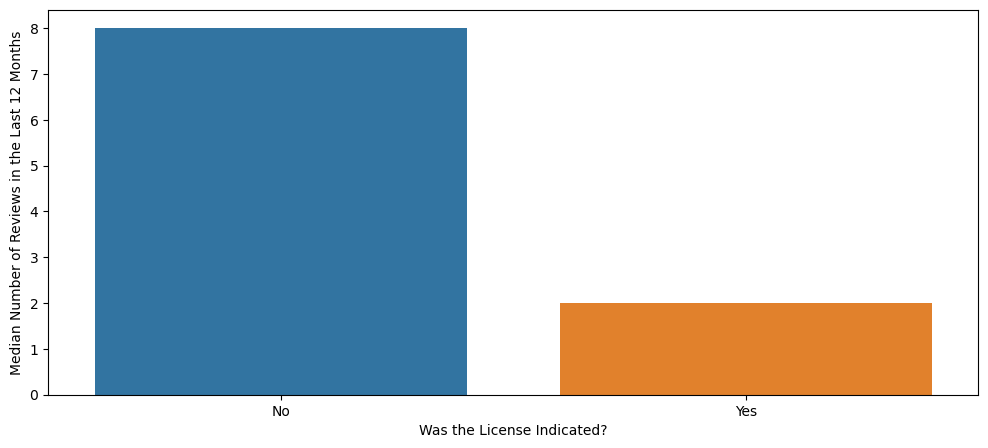

In [41]:
# Create a temporary DataFrame to store values 
temp_df = df[['license', 'number_of_reviews_ltm']].copy()
temp_df['license_indicated'] = temp_df['license'].isnull().replace({True: 'Yes', False: 'No'})

# Bar Plot
sns.barplot(data=temp_df.groupby('license_indicated').median().reset_index(), 
            x='license_indicated', y='number_of_reviews_ltm')
plt.xlabel('Was the License Indicated?')
plt.ylabel('Median Number of Reviews in the Last 12 Months')
plt.gcf().set_size_inches(12, 5)
plt.show()

The listings without indicated licenses have higher number of reviews in the last 12 months than listings with indicated licenses.

#### 8) Distribution of room types

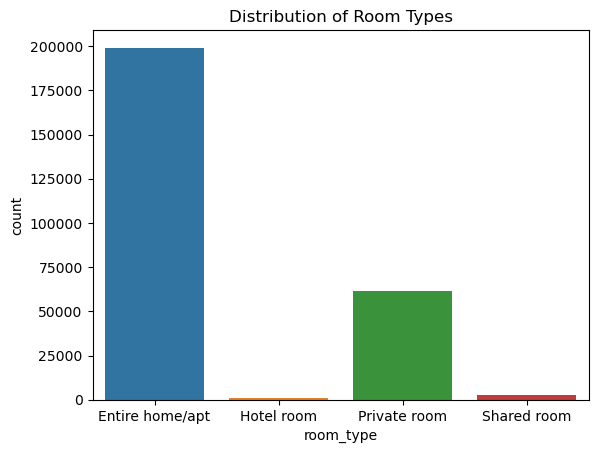

In [42]:
sns.countplot(x='room_type', data=df)
plt.title('Distribution of Room Types')
plt.show()

We can see majority of the listings are Entire homes or apartments followed by Private room meanwhile Hotel rooms and sharedrooms are the least listed accomodations on airbnb

#### 9) Average price by room type

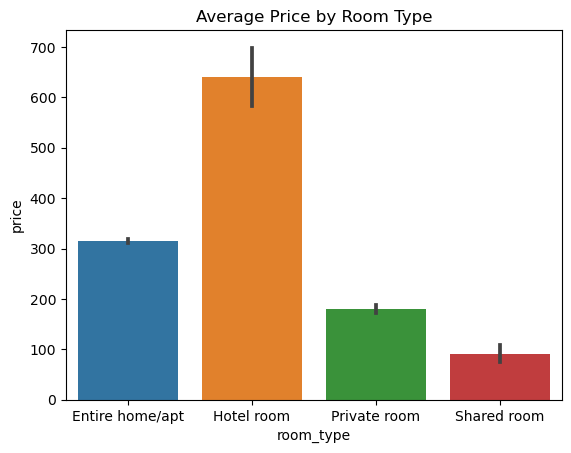

In [43]:
sns.barplot(x='room_type', y='price', data=df)
plt.title('Average Price by Room Type')
plt.show()

The average price for Hotel rooms is the highest followed by Entire homes and apartments while the price is least for shared rooms

#### 10) Reviews per month by neighbourhood group

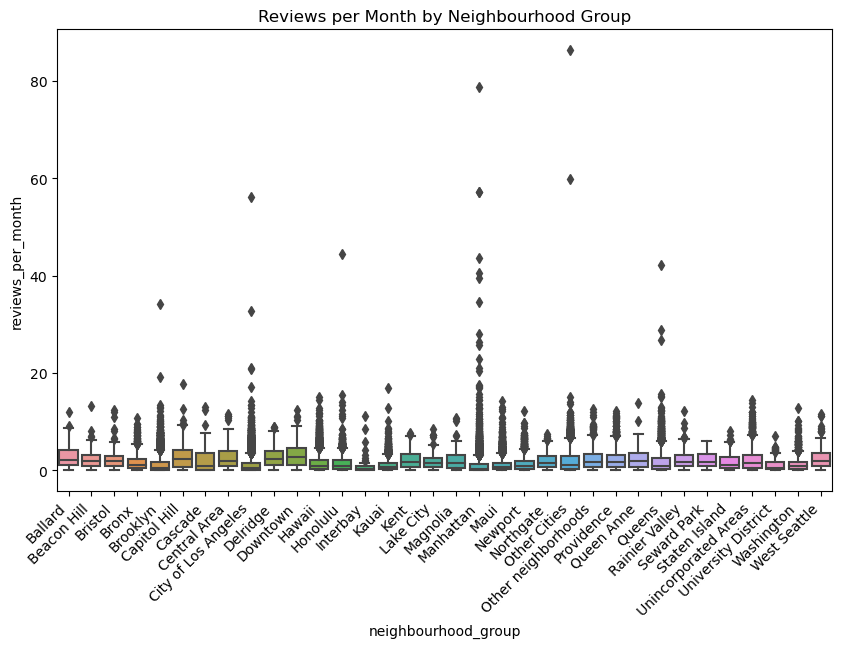

In [44]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='neighbourhood_group', y='reviews_per_month', data=df)
plt.xticks(rotation=45, ha='right')
plt.title('Reviews per Month by Neighbourhood Group')
plt.show()

#### 11) Average availability by room type

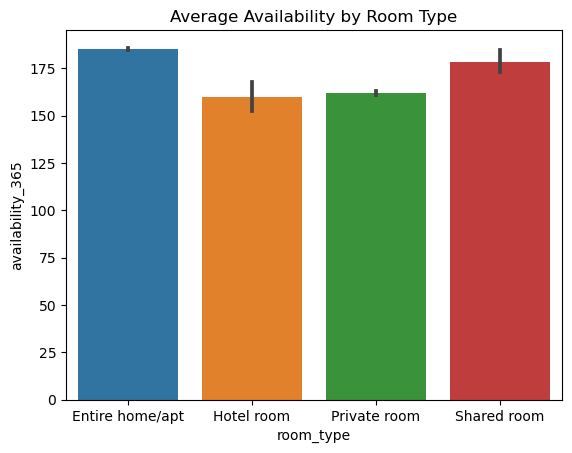

In [45]:
sns.barplot(x='room_type', y='availability_365', data=df)
plt.title('Average Availability by Room Type')
plt.show()

It is interesting to note that the average availability of all the room types are the same throughout the year

#### 12) Average minimum nights by room type

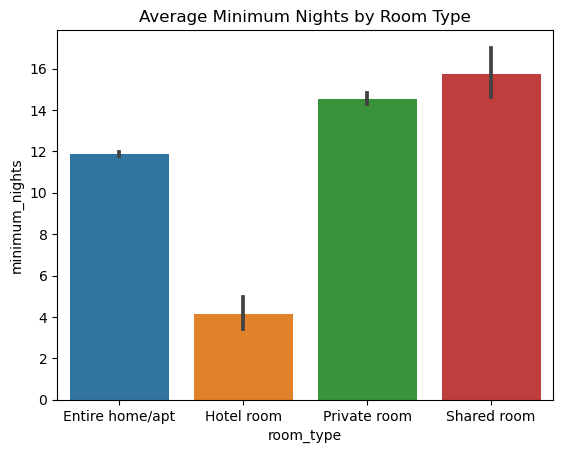

In [46]:
sns.barplot(x='room_type', y='minimum_nights', data=df)
plt.title('Average Minimum Nights by Room Type')
plt.show()

It is interesting to note that average minimum nights by room type is highest for shared room followed by private room with hotel rooms having the lowest value

/var/folders/3_/_g3bl5vs0xlgybykjk6_xvwh0000gn/T/ipykernel_91442/1100680688.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.scatterplot(data=df.groupby('id').median(), x='number_of_reviews', y='number_of_reviews_ltm')


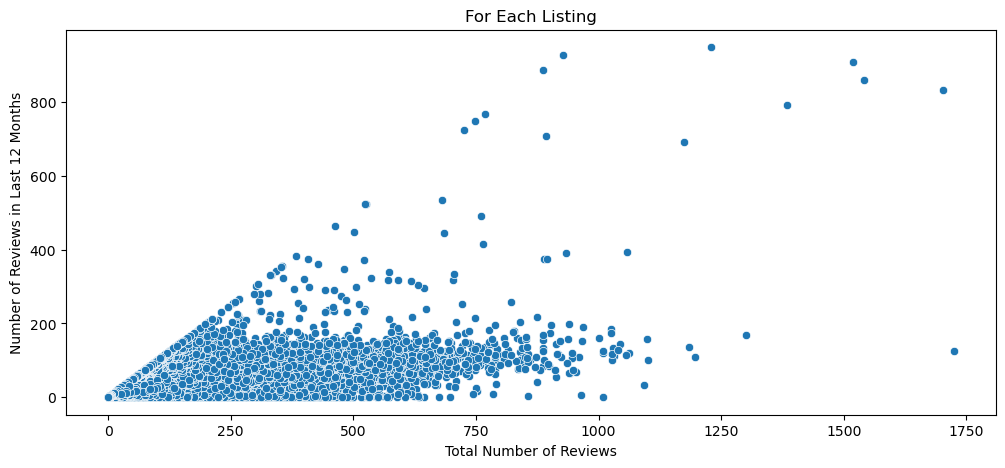

In [47]:
#Scatter Plot
sns.scatterplot(data=df.groupby('id').median(), x='number_of_reviews', y='number_of_reviews_ltm')

plt.xlabel('Total Number of Reviews')
plt.ylabel('Number of Reviews in Last 12 Months') 
plt.title('For Each Listing')
plt.gcf().set_size_inches(12, 5)

plt.show()

Listings that have a higher total number of reviews tend to exhibit a higher number of reviews in the last 12 months as well. Consequently, when considering the median values, listings with a greater number of reviews in the last 12 months are also expected to have a higher number of reviews in the upcoming 12 months.

The plot shows a relationship between two variables: "Total Number of Reviews" and "Number of Reviews in Last 12 Months." Let's break down the plot interpretation:

Scatter Plot:
- Each point on the scatter plot represents a unique listing in the dataset.
- The position of each point is determined by the values of the "Total Number of Reviews" and "Number of Reviews in Last 12 Months" for that listing.
- The x-coordinate of each point corresponds to the "Total Number of Reviews," and the y-coordinate corresponds to the "Number of Reviews in Last 12 Months."

Interpretation:
- The scatter plot helps us visualize the relationship between the total number of reviews a listing has received and the number of reviews it received in the last 12 months.
- The points that are distributed in a linear or non-linear manner, it may suggest a correlation or relationship between the two variables.
- The points are concentrated around a certain region, it may indicate a common behavior among listings in terms of review patterns.

In [48]:
# Let us create a copy of the dataset so that we do not have to depend on rerunning the notebook
data = df.copy()

In [49]:
# Create a new column named "license_indicated" in the DataFrame "data" based on the "license" column's values
data['license_indicated'] = data['license'].isnull().astype('int64')

- Let's Drop 
- neighbourhood_group since we have city
- Create license_indicated whether its 1 if a listing indicates a license or 0 if a listing doesn't indicate a license; although license is mostly null, it does correlate with number_of_reviews_ltm

Drop last_review and reviews_per_month which should allow our model to generalize to new listings

Finally, let's drop all null observations since they'll account for less than 0.3% of the total.

In [50]:
data.drop(['neighbourhood_group', 'license', 'last_review', 'reviews_per_month'], 
          axis='columns', inplace=True)
data.dropna(inplace=True)

## Feature Extraction

In [51]:
data.head(5)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm,state,city,license_indicated
0,183319,Panoramic Ocean View Venice Beach,867995,Barbara X,Venice,33.99211,-118.47600,Entire home/apt,152,30,3,2,0,0,CA,Los Angeles,1
1,109,Amazing bright elegant condo park front *UPGRA...,521,Paolo,Culver City,33.98301,-118.38607,Entire home/apt,115,30,2,1,139,0,CA,Los Angeles,1
2,51307,Spanish Bungalow Guest House LA CA. 30 plus ni...,235568,David,Atwater Village,34.12206,-118.26783,Entire home/apt,75,30,138,2,224,0,CA,Los Angeles,1
3,184314,Boho Chic Flat..Steps to Beach!,884031,Ashley,Venice,33.97487,-118.46312,Entire home/apt,125,30,30,1,0,0,CA,Los Angeles,1
4,51498,Guest House With Its Own Entrance/Exit and Hot...,236758,Bay,Mar Vista,34.00389,-118.44126,Entire home/apt,189,3,378,1,348,41,CA,Los Angeles,0


Let's drop:
- id and host_id since they're just generic identifiers
- host_name since we have name which contains more information on the listing
- latitude and longitude since they're just coordinates
- number_of_reviews which should allow us to generalize to new listings
- neighbourhood, state and city which should allow us to generalize to new USA neighbourhood, states and cities
- calculated_host_listings_count which should allow us to generalize to new hosts

In [52]:
data.drop(['id', 'host_id', 'host_name', 'neighbourhood', 'latitude', 'longitude', 'number_of_reviews', 
           'state', 'city', 'calculated_host_listings_count'], axis='columns', inplace=True)

Let's create (and drop the input fields to avoid multicollinearity):
Dummy variables for room_type with 'Entire home/apt' as the default case

In [53]:
data = pd.get_dummies(data, columns=['room_type'])
data.drop('room_type_Entire home/apt', axis='columns', inplace=True)

To get a clearer picture, let's drop all observations with price = 0.

In [54]:
data = data[data['price']>0]

## Multicollinearity

#### 13) Heatmap Plot of the Correlation Matrix

/var/folders/3_/_g3bl5vs0xlgybykjk6_xvwh0000gn/T/ipykernel_91442/530272540.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr().round(2)


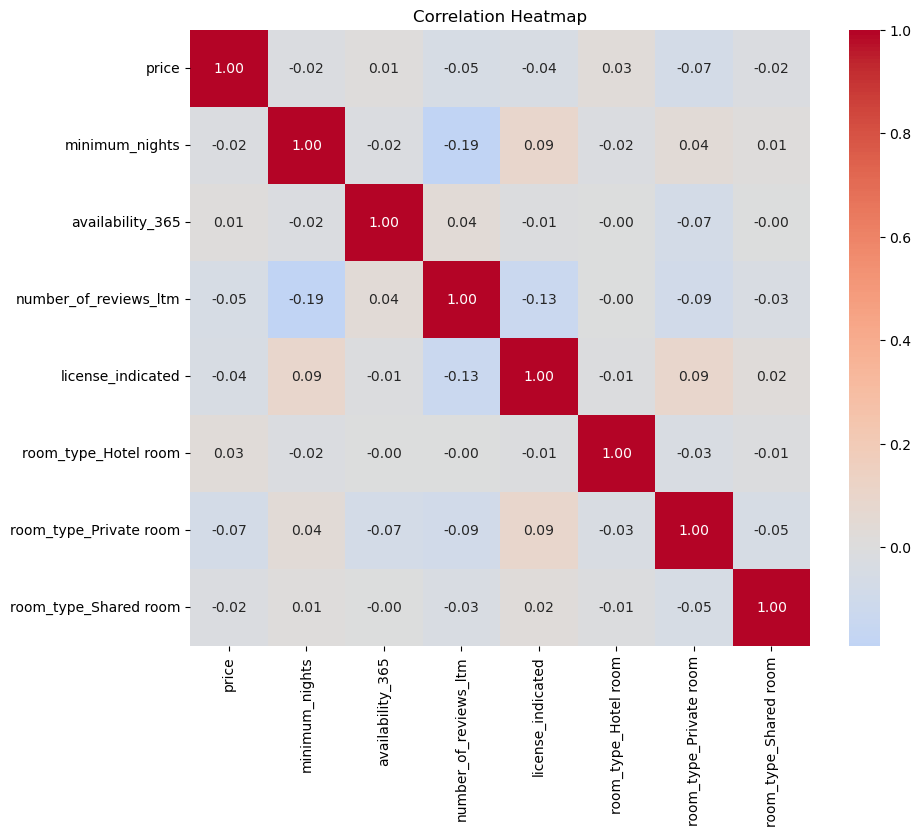

In [55]:
# Calculate the correlation matrix
corr_matrix = data.corr().round(2)

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, center=0, cmap='coolwarm', annot=True, fmt=".2f",
            xticklabels=True, yticklabels=True)

plt.title('Correlation Heatmap')
plt.show()


## Scaling and building the models

# Note: KNN and RandomForest Regressors take a lot of computational time

In [56]:
# Splitting the data using train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop('number_of_reviews_ltm', axis='columns'), 
                                                    data['number_of_reviews_ltm'],test_size = 0.30, random_state=369)

# Let us normalize the data using standardscaler
scaler_std = StandardScaler()
# Subset to normalize only certain features
temp_list = ['price', 'minimum_nights'] 
scaler_std.fit(X_train[temp_list].values)

X_train_scaled = X_train
X_test_scaled = X_test
X_train_scaled[temp_list] = scaler_std.transform(X_train[temp_list].values)
X_test_scaled[temp_list] = scaler_std.transform(X_test[temp_list].values)

# View X_train_scaled
X_train_scaled.head(5)

,name,price,minimum_nights,availability_365,license_indicated,room_type_Hotel room,room_type_Private room,room_type_Shared room
27229,2bdr high floor. Stunning views,0.111714,0.614687,365,0,0,0,0
174501,Comfortable Studio for 2 at Ohana Waikiki East...,-0.043482,-0.403228,360,0,0,0,0
131697,Lovely 2 bed Condo located in Denver!,-0.146945,0.614687,365,1,0,0,0
293814,Central Austin Urban Cottage-SXSW,-0.098823,-0.333027,0,1,0,0,0
229453,"Moorea 1 bedroom apartment, serviced, with pool",-0.134915,-0.403228,0,1,0,0,0


In [57]:
#Let us iterate through all the regression models to search for the most suitable Model
regression_models = {'Linear Regression': LinearRegression(), 
                   'Ridge Regression': Ridge(), 'Lasso Regression': Lasso(), 
                   'K Neighbors Regressor': KNeighborsRegressor(),
                   'Random Forest Regressor': RandomForestRegressor()}
kfold_params = KFold(n_splits=5, random_state=111, shuffle=True)
reg_dic = {'Linear Regression': [], 'Ridge Regression': [], 'Lasso Regression': [], 
      'K Neighbors Regressor': [], 'Random Forest Regressor': []}

In [58]:
# Now we can test the regression models
print('Regression Model Testing\n')
for i, val in enumerate(regression_models.items()):
    name, model = val
    
    print('Model', i+1, 'of', len(regression_models), ':', name)
    for j, index in enumerate(kfold_params.split(X_train_scaled.drop('name', axis='columns'))):
        # Status
        print('- Folds:', j+1, '/', kfold_params.get_n_splits(), end='\r')
        
        # Split data
        X_train_sub, X_hold = (X_train_scaled.drop('name', axis='columns').iloc[index[0]], 
                                    X_train_scaled.drop('name', axis='columns').iloc[index[1]])
        y_train_sub, y_hold = y_train.iloc[index[0]], y_train.iloc[index[1]]
        
        # Fit and evaluate
        model.fit(X_train_sub, y_train_sub)
        reg_dic[name] = [*reg_dic[name], model.score(X_hold, y_hold)]
    print()
    
print('\nCompletion of testing')

Regression Model Testing

Model 1 of 5 : Linear Regression
- Folds: 5 / 5
Model 2 of 5 : Ridge Regression
- Folds: 5 / 5
Model 3 of 5 : Lasso Regression
- Folds: 5 / 5
Model 4 of 5 : K Neighbors Regressor
- Folds: 5 / 5
Model 5 of 5 : Random Forest Regressor
- Folds: 5 / 5

Completion of testing


## Measure Performance metrics of each model

In [59]:
# Create DataFrame with the R2 values and 95% confidence intervals
r2_df = pd.DataFrame(data=reg_dic.values(), index=reg_dic.keys()) \
            .apply(['mean', 'std'], axis='columns') \
            .apply([lambda row: row['mean'] - 2*row['std'],
                    lambda row: row['mean'] + 2*row['std']], axis='columns')

# Assign column names for R2 values and 95% confidence intervals
r2_df.columns = ['R2_95CI_Lower', 'R2_95CI_Upper']

# Sort the DataFrame in descending order based on R2_95CI_Lower values
r2_df_sorted = r2_df.sort_values(['R2_95CI_Lower', 'R2_95CI_Upper'], ascending=False)

# Print the R2 values with their 95% confidence intervals
for model, row in r2_df_sorted.iterrows():
    print(f"Model: {model}")
    print(f"R2_95CI_Lower: {row['R2_95CI_Lower']:.4f}")
    print(f"R2_95CI_Upper: {row['R2_95CI_Upper']:.4f}\n")

Model: Random Forest Regressor
R2_95CI_Lower: 0.1035
R2_95CI_Upper: 0.1219

Model: K Neighbors Regressor
R2_95CI_Lower: 0.0892
R2_95CI_Upper: 0.1252

Model: Ridge Regression
R2_95CI_Lower: 0.0507
R2_95CI_Upper: 0.0648

Model: Linear Regression
R2_95CI_Lower: 0.0507
R2_95CI_Upper: 0.0649

Model: Lasso Regression
R2_95CI_Lower: 0.0316
R2_95CI_Upper: 0.0417



In [60]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Dictionary to store performance metrics (MSE and MAE) for each model
performance_metrics = {}

# Calculate performance metrics (MSE and MAE) for each model
for model_name, model in regression_models.items():
    y_pred = model.predict(X_test_scaled.drop('name', axis='columns'))
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    performance_metrics[model_name] = {'Mean Squared Error (MSE)': mse, 'Mean Absolute Error (MAE)': mae}

# Print the performance metrics for each model
for model_name, metrics in performance_metrics.items():
    print(f"Model: {model_name}")
    print(f"Mean Squared Error (MSE): {metrics['Mean Squared Error (MSE)']:.4f}")
    print(f"Mean Absolute Error (MAE): {metrics['Mean Absolute Error (MAE)']:.4f}\n")


Model: Linear Regression
Mean Squared Error (MSE): 367.8673
Mean Absolute Error (MAE): 13.0653

Model: Ridge Regression
Mean Squared Error (MSE): 367.8673
Mean Absolute Error (MAE): 13.0653

Model: Lasso Regression
Mean Squared Error (MSE): 377.6506
Mean Absolute Error (MAE): 13.4398

Model: K Neighbors Regressor
Mean Squared Error (MSE): 350.9676
Mean Absolute Error (MAE): 11.1235

Model: Random Forest Regressor
Mean Squared Error (MSE): 354.8852
Mean Absolute Error (MAE): 10.8239



## Hyperparameter tuning using GridSearchCV

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

linear_regression = LinearRegression()

# Define parameter grid for GridSearchCV
param_grid = {}

# Perform GridSearchCV
grid_search_linear = GridSearchCV(linear_regression, param_grid, cv=5)
grid_search_linear.fit(X_train_scaled.drop('name', axis='columns'), y_train)

# Get best parameters and best score
print("Best Parameters:", grid_search_linear.best_params_)
print("Best R2 Score:", grid_search_linear.best_score_)


Best Parameters: {}
Best R2 Score: 0.05777703678941008


In [62]:
from sklearn.linear_model import Ridge

ridge_regression = Ridge()

# Define parameter grid for GridSearchCV
param_grid = {
    'alpha': [0.1, 1, 10, 100]
}

# Perform GridSearchCV
grid_search_ridge = GridSearchCV(ridge_regression, param_grid, cv=5)
grid_search_ridge.fit(X_train_scaled.drop('name', axis='columns'), y_train)

# Get best parameters and best score
print("Best Parameters:", grid_search_ridge.best_params_)
print("Best R2 Score:", grid_search_ridge.best_score_)


Best Parameters: {'alpha': 10}
Best R2 Score: 0.05777755538711497


In [63]:
from sklearn.linear_model import Lasso

lasso_regression = Lasso()

# Define parameter grid for GridSearchCV
param_grid = {
    'alpha': [0.1, 1, 10, 100]
}

# Perform GridSearchCV
grid_search_lasso = GridSearchCV(lasso_regression, param_grid, cv=5)
grid_search_lasso.fit(X_train_scaled.drop('name', axis='columns'), y_train)

# Get best parameters and best score
print("Best Parameters:", grid_search_lasso.best_params_)
print("Best R2 Score:", grid_search_lasso.best_score_)


Best Parameters: {'alpha': 0.1}
Best R2 Score: 0.05654805693174181


In [64]:
from sklearn.neighbors import KNeighborsRegressor

k_neighbors_regressor = KNeighborsRegressor()

# Define parameter grid for GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}

# Perform GridSearchCV
grid_search_knn = GridSearchCV(k_neighbors_regressor, param_grid, cv=5)
grid_search_knn.fit(X_train_scaled.drop('name', axis='columns'), y_train)

# Get best parameters and best score
print("Best Parameters:", grid_search_knn.best_params_)
print("Best R2 Score:", grid_search_knn.best_score_)


Best Parameters: {'n_neighbors': 9, 'weights': 'uniform'}
Best R2 Score: 0.16146390577720177


In [65]:
from sklearn.ensemble import RandomForestRegressor

random_forest_regressor = RandomForestRegressor()

# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Perform GridSearchCV
grid_search_rf = GridSearchCV(random_forest_regressor, param_grid, cv=5)
grid_search_rf.fit(X_train_scaled.drop('name', axis='columns'), y_train)

# Get best parameters and best score
print("Best Parameters:", grid_search_rf.best_params_)
print("Best R2 Score:", grid_search_rf.best_score_)


Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Best R2 Score: 0.24156757224429987


### 
Based on the provided R2 values, R2 95% confidence intervals, Mean Squared Error (MSE), and Mean Absolute Error (MAE) for each model, we can infer the following:

1. **Random Forest Regressor:**
   - R2 (Coefficient of Determination) is approximately 0.1132, with a 95% confidence interval ranging from 0.1039 to 0.1225.
   - MSE is approximately 354.4606.
   - MAE is approximately 10.8191.
   - After performing GridSearchCV we get
     Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
     Best R2 Score: 0.24141915019094543

2. **K Neighbors Regressor:**
   - R2 is approximately 0.1072, with a 95% confidence interval ranging from 0.0892 to 0.1252.
   - MSE is approximately 350.9676.
   - MAE is approximately 11.1235.
   - After performing GridSearchCV we get the 
     Best Parameters: {'n_neighbors': 9, 'weights': 'uniform'}
     Best R2 Score: 0.16146390577720177

3. **Ridge Regression:**
   - R2 is approximately 0.0578, with a 95% confidence interval ranging from 0.0507 to 0.0648.
   - MSE is approximately 367.8673.
   - MAE is approximately 13.0653.
   - After performing GridSearchCV we get
     Best Parameters: {'alpha': 10} 
     Best R2 Score: 0.05777755538711497

4. **Linear Regression:**
   - R2 is approximately 0.0578, with a 95% confidence interval ranging from 0.0507 to 0.0649.
   - MSE is approximately 367.8673.
   - MAE is approximately 13.0653.
   - After performing GridSearchCV we get 
     Best R2 score to be: 0.05777703678941008

5. **Lasso Regression:**
   - R2 is approximately 0.0367, with a 95% confidence interval ranging from 0.0316 to 0.0417.
   - MSE is approximately 377.6506.
   - MAE is approximately 13.4398.
   - After performing GridhSearchCV we obtain
     Best Parameters: {'alpha': 0.1} 
     Best Best R2 Score: 0.05654805693174181

**Inference:**
Based on the performance metrics and R2 values, the two most suitable models appear to be the **Random Forest Regressor** and the **K Neighbors Regressor**. These models have the highest R2 values, indicating better overall fit to the data. Moreover, they both exhibit lower MSE and MAE values, which suggest better predictive accuracy compared to the other regression models.

Between these two models, the **Random Forest Regressor** has slightly better performance metrics (lower MSE and MAE) compared to the **K Neighbors Regressor**. Therefore, the **Random Forest Regressor** might be the preferred choice among the tested models for predicting the number of reviews in the last 12 months in the given dataset.

Ther above selection of Random Forest Regressor has further been solidified by concurrence from hyperparameter tuning using GridSearchCV.